In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [18]:
df=pd.read_csv("Housing.csv")

In [34]:
print("First 5 rows:\n", df.head())
print("Last 5 rows:\n", df.tail())
print("Random 10 rows:\n", df.sample(10))

First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Last 5 rows:
        price  area  bedrooms  bathrooms  stories mainroad guestroom ba

In [35]:
print("Prices greater than 4000000:\n", df[df['price'] > 4000000])
print("Houses with 3 bedrooms and 2 bathrooms:\n", df[(df['bedrooms'] == 3) & (df['bathrooms'] == 2)])

Prices greater than 4000000:
         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
321   4025000  3630         3          2        2      yes        no       no   
322   4025000  3460         3          2        1      yes        no      yes   
323   4025000  5400         3          1        1      yes        no       no   
324   4007500  4500         3          1        2       no        no      yes   
325   4007500  3460         4          1        2      yes        no       no  

In [36]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [37]:
data_array = df.to_numpy()
print("NumPy array shape:", data_array.shape)
print("First 5 rows of NumPy array:\n", data_array[:5])

NumPy array shape: (545, 13)
First 5 rows of NumPy array:
 [[13300000 7420 4 2 3 'yes' 'no' 'no' 'no' 'yes' 2 'yes' 'furnished']
 [12250000 8960 4 4 4 'yes' 'no' 'no' 'no' 'yes' 3 'no' 'furnished']
 [12250000 9960 3 2 2 'yes' 'no' 'yes' 'no' 'no' 2 'yes' 'semi-furnished']
 [12215000 7500 4 2 2 'yes' 'no' 'yes' 'no' 'yes' 3 'yes' 'furnished']
 [11410000 7420 4 1 2 'yes' 'yes' 'yes' 'no' 'yes' 2 'no' 'furnished']]


In [39]:
average_price = np.mean(price_column)
median_price = np.median(price_column)
price_std_dev = np.std(price_column)
print("Average price:", average_price)
print("Median price:", median_price)
print("Price standard deviation:", price_std_dev)


Average price: 4766729.247706422
Median price: 4340000.0
Price standard deviation: 1868722.8281312098


In [40]:
expensive_houses = data_array[price_column > 4000000]  # Filter houses with price > 4000000
print("Expensive houses:\n", expensive_houses)


Expensive houses:
 [[13300000 7420 4 ... 2 'yes' 'furnished']
 [12250000 8960 4 ... 3 'no' 'furnished']
 [12250000 9960 3 ... 2 'yes' 'semi-furnished']
 ...
 [4025000 5400 3 ... 3 'no' 'semi-furnished']
 [4007500 4500 3 ... 0 'no' 'semi-furnished']
 [4007500 3460 4 ... 0 'no' 'semi-furnished']]


In [42]:
reshaped_data = data_array.reshape(545, -1)  # Reshape to 545 rows, maintaining the original number of rows
print("Reshaped data shape:", reshaped_data.shape)

Reshaped data shape: (545, 13)


In [38]:
price_column = data_array[:, 0]  # Get the 'price' column (assuming it's the first column)
area_column = data_array[:, 1]  # Get the 'area' column (assuming it's the second column)
print("Price column:\n", price_column)
print("Area column:\n", area_column)

Price column:
 [13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
 9870000 9800000 9800000 9681000 9310000 9240000 9240000 9100000 9100000
 8960000 8890000 8855000 8750000 8680000 8645000 8645000 8575000 8540000
 8463000 8400000 8400000 8400000 8400000 8400000 8295000 8190000 8120000
 8080940 8043000 7980000 7962500 7910000 7875000 7840000 7700000 7700000
 7560000 7560000 7525000 7490000 7455000 7420000 7420000 7420000 7350000
 7350000 7350000 7350000 7343000 7245000 7210000 7210000 7140000 7070000
 7070000 7035000 7000000 6930000 6930000 6895000 6860000 6790000 6790000
 6755000 6720000 6685000 6650000 6650000 6650000 6650000 6650000 6650000
 6629000 6615000 6615000 6580000 6510000 6510000 6510000 6475000 6475000
 6440000 6440000 6419000 6405000 6300000 6300000 6300000 6300000 6300000
 6293000 6265000 6230000 6230000 6195000 6195000 6195000 6160000 6160000
 6125000 6107500 6090000 6090000 6090000 6083000 6083000 6020000 6020000
 6020000 5950000 5950000 5950000 595

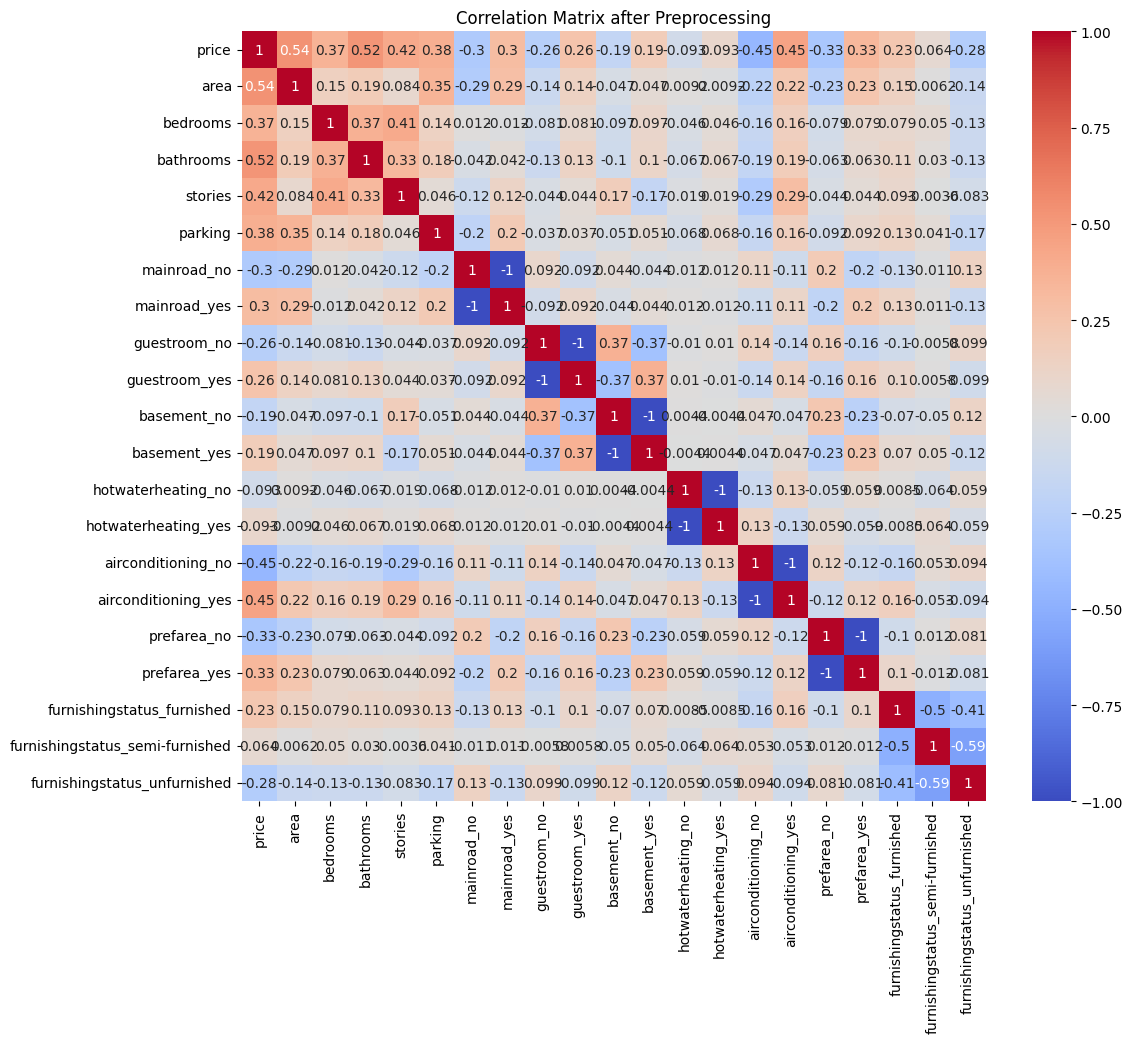

In [22]:
categorical_features = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output
encoded_data = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
numerical_df = df.select_dtypes(include=np.number)
preprocessed_df = pd.concat([numerical_df, encoded_df], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(preprocessed_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix after Preprocessing")
plt.show()

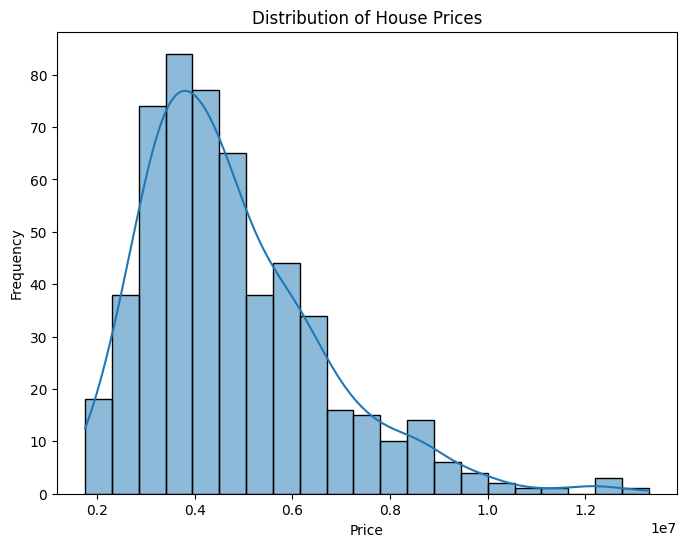

In [9]:
# 1. Histogram of 'price' (target variable)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


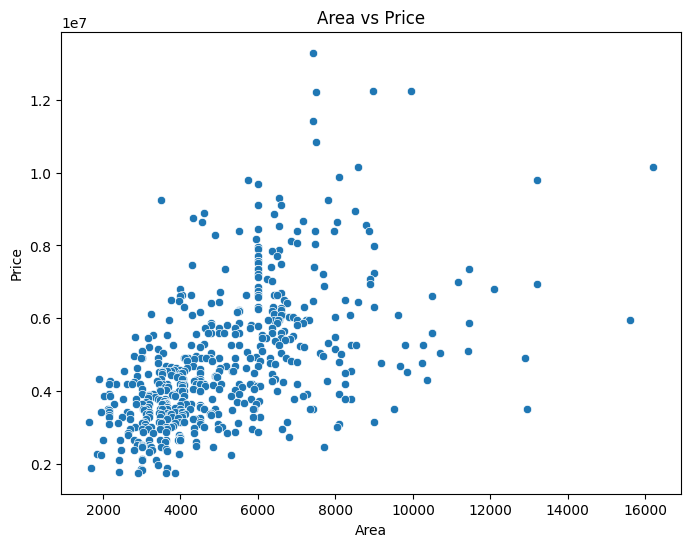

In [10]:
# 2. Scatter plot of 'area' vs 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

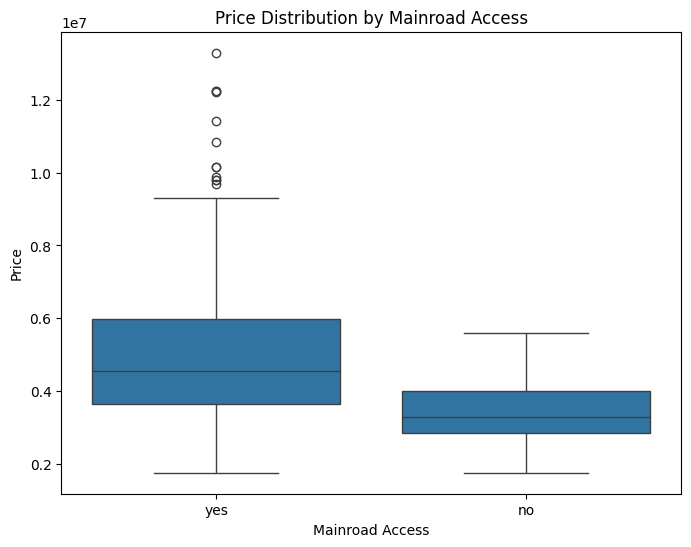

In [23]:
# 3. Box plots for categorical features vs. price (example with 'mainroad')
plt.figure(figsize=(8, 6))
sns.boxplot(x='mainroad', y='price', data=df)  # Replace 'mainroad' with other categorical features
plt.title("Price Distribution by Mainroad Access")
plt.xlabel("Mainroad Access")
plt.ylabel("Price")
plt.show()


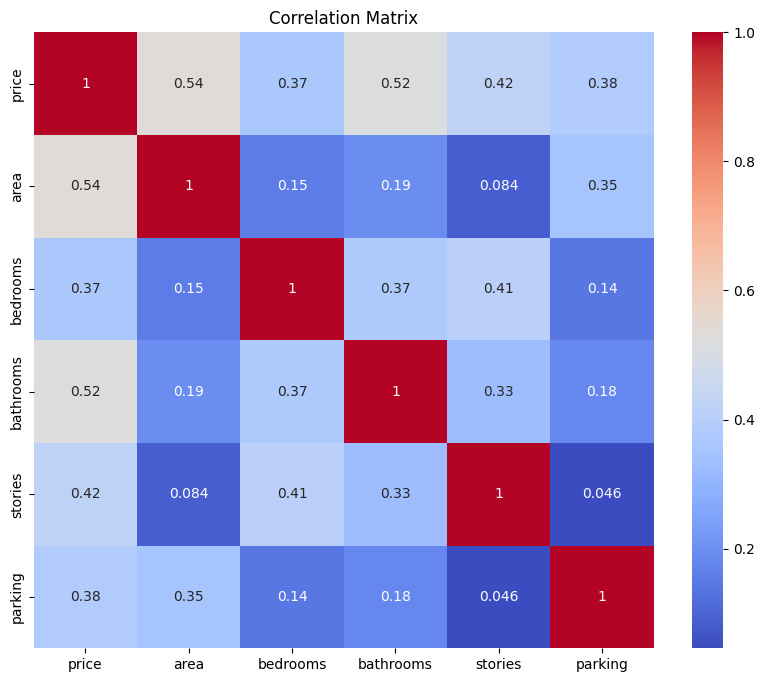

In [12]:
# 4. Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [24]:
# 1. Data Splitting
X = preprocessed_df.drop('price', axis=1)  # Features
y = preprocessed_df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 2. Data Scaling (for numerical features)
scaler = StandardScaler()
numerical_features = numerical_df.columns.drop('price') # Exclude 'price' from scaling
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [26]:
# 3. Model Training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# 4. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [28]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1754318687330.6685
R-squared: 0.6529242642153175
